# Uniform Distribution & Normal Distribution


## Introduction
In this notebook we are going to explain about normal and uniform distributions with it's apllications.

## Uniform Distribution
*uniform distribution* or *rectangular distribution* is a distribution that has constant probability. Uniform distribution is defined by 2 parameters:
- a, the minimum value
- b, the maximum value

It also has mean value, standard deviation value and also the number of slices between a and b. 

In [2]:
%%html
<img src="https://raw.githubusercontent.com/ravelgwong/comp-math/master/comp-math-img.png">

On the picture above, we can get the height from this formula :
    $ \frac{1}{b-a} $  

b on this image is 30 and a is 0 so we can get: <br> $ \frac{1}{30-0} $ = $ \frac{1}{30} $

Then, We have 2 ways to get the probability of the blue square which are calculus and .....          

For the calculus, the formula is: $\int_a^b height$

In this formula, b is the maximum value of the square and a is the minimum value of the square. Thus, we will get this:
$\int_10^20 \frac{1}{30}$
<br>
$\frac{1}{30} 20 - \frac{1}{30} 10$ 
<br>
<br>
$\frac{10}{30}$


The second way is the easiest one. So, you only have to multiply the height with the difference between a and b of the blue square. The formula is:
<br>
$ \frac{1}{height} (b-a) $  


Thus, we can get the probability by using those formula
<br>
$ \frac{1}{30} (20-10) $ 
<br>
$\frac{10}{30}$

# Uniform Distribution Application

# Create a random number generator that is uniformly distributed

## Import the required library

In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display,clear_output

## Create a basic random number generator for range (0.0 to 1.0)

### Create a basic seed generator that uses current timestamp

In [4]:
def getSeed(x1:int = 1234, x2:int = 3456 , x3:int = 6789):
    a = int(time.time() * 1000) #Get current time as millisecond
    x = a % x1
    y = a % x2
    z = a % x3
    return x if x != 0 else x1,y if y!= 0 else x2,z if z!= 0 else x3

### Create an uniformly distributed random generator with Wichmann–Hill Algorithm

In [5]:
def random(seed:[int]):
    x = (171 * seed[0]) % 30269
    y = (172 * seed[1]) % 30307
    z = (170 * seed[2]) % 30323
    return (x/30269 + y/30307 + z/30323) % 1

In [6]:
# Try the random generator based on the time seed.
random(getSeed())

0.5176287992986444

## Create a uniform distribuation based random number in range a,b

In [7]:
def uniform(a,b,seed):
    return a + (b-a) * random(seed)

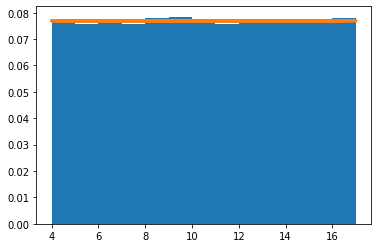

In [8]:
x = []
for i in range(1,100000,1):
    d = (uniform(4,17,getSeed(i,i+1,i+2)))
    x.append(d)
plt.hist(x,density = 2, bins = 17-4)
plt.plot(x, [1/(17-4) for x in range(len(x))],lw =3)

#### Decrease the number of trial

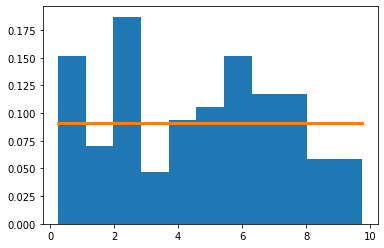

In [9]:
x = []
for i in range(1,100,1):
    d = (uniform(0,11,getSeed(i,i+1,i+2)))
    x.append(d)
plt.hist(x,density = 3, bins = 11)
plt.plot(x, [1/(11-0) for x in range(len(x))],lw =3)

# Try it yourself

## Create a random number that is uniformly distributed

In [10]:
lower = widgets.IntSlider(
    min=0,
    max=50,
    step=1,
    description='Lower Bound:',
    value=0
)
upper = widgets.IntSlider(
    min=0,
    max=50,
    step=1,
    description='Lower Bound:',
    value=10
)

res = widgets.HTML(
    value="",
    placeholder='Result:',
    description='Result:',
)
btn = widgets.Button(description='Get Random')

display(lower)
display(upper)
display(btn)
display(res)
def btn_eventhandler(obj):
    if not(lower.value >= upper.value):
        res.value = str(uniform(lower.value,upper.value,getSeed()))
    else:
        res.value = str('Upper bound should be higher than lower bound')
btn.on_click(btn_eventhandler)

IntSlider(value=0, description='Lower Bound:', max=50)

IntSlider(value=10, description='Lower Bound:', max=50)

Button(description='Get Random', style=ButtonStyle())

HTML(value='', description='Result:', placeholder='Result:')

In [16]:
lower = widgets.IntSlider(
    min=0,
    max=50,
    step=1,
    description='Lower Bound:',
    value=0
)
upper = widgets.IntSlider(
    min=0,
    max=50,
    step=1,
    description='Upper Bound:',
    value=10
)
rep = widgets.IntSlider(
    min=100,
    max=2500,
    step=1,
    description='Repetition:',
    value=10
)

p = widgets.IntProgress(
    value=0,
    min=0,
    max=10,
    step=1,
    description='Calculating:',
    bar_style='success',
    orientation='horizontal'
)
btn = widgets.Button(description='Display')
cal:bool = False

res = widgets.HTML(
    value="",
)


out1 = widgets.Output()
out2 = widgets.Output()
tab = widgets.Tab(children = [out1, out2])
tab.set_title(0, 'Settings')
tab.set_title(1, 'Result')
display(tab)
with out1:
    display(res)
    display(btn)
    display(lower)
    display(upper)
    display(rep)
    display(p)

def btn_eventhandler(obj):
    x = []
    if not(lower.value >= upper.value):
        with out2:
            clear_output()
            res.value=''
            p.max = rep.value
            p.text='Calculating'
            print('Upper Bound: '+str(upper.value))
            print('Lower Bound:' + str(lower.value))
            for i in range(1,rep.value + 1,1):
                d = (uniform(lower.value,upper.value,getSeed(i,i+1,i+2)))
                x.append(d)
                p.value = i
            p.value = 0
            p.text='Done'
            %matplotlib inline
            fig,ax = plt.subplots()
            ax.hist(x,density = 2,bins=(int(upper.value)-int(lower.value)))
            ax.plot(x, [1/(upper.value-lower.value) for x in range(rep.value)],lw=3)
            plt.show(fig)
    else:
        res.value = str('Upper bound should be higher than lower bound')
btn.on_click(btn_eventhandler)

## Normal Distribution

*Normal distribution* or *Gaussian distribution* is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution will appear as a bell curve.

The graph of Normal Distribution is depend on standard deviation and also mean of the data. Mean of the data determines location of the graph while standard deviation determines the height and width of the graph. If the standard deviation is small, the curve will be tall and narrow. Otherwise, it will be short and wide.

In [3]:
%%html
<img src="https://raw.githubusercontent.com/ravelgwong/comp-math/master/normal-dist.png">

# Normal Distribution Application

## Import the required library

In [12]:
import ipywidgets as widgets
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

## Use of interactive to link the graph method and the slider

In [13]:
def update_plot(x_mean, x_std, x_total):
    plt.style.use("ggplot")
    fig = plt.figure(1); plt.clf()
    ax = fig.add_subplot(1,1,1)
    x = np.random.normal(x_mean, x_std, x_total)
    domain = np.linspace(-200, 500, x_total)
    ax.hist(x, rwidth = 0.9, density = True, label = "Data")
    ax.plot(domain, stats.norm.pdf(domain,x_mean,x_std), label = "Estimated")
    ax.legend()
    plt.show()

x_mean = widgets.FloatSlider(min=0, max=300,value=150,description="Mean")
x_std = widgets.FloatSlider(min=10, max=100,value=50,description="Standard deviation")
x_total = widgets.IntSlider(min=10, max=1000,value=500,description="Total data")

widgets.interactive(update_plot, x_mean=x_mean, x_std=x_std, x_total=x_total)

interactive(children=(FloatSlider(value=150.0, description='Mean', max=300.0), FloatSlider(value=50.0, descrip…

You can see that if the mean is low than the graph will show on the left side, if the mean is high than the graph will show on the right. The shape of the graph will change if you change the standard deviation, the lower your standard deviation the higher your graph ,while the higher your standard deviation the graph will be lower and wider. The total data will affect the graph too since having a low data make your graph messy since lack of sample and having more data will make this normal distribution more accurate.